In [1]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
old_model = ChoiceModel()

In [3]:
data = pd.DataFrame(columns=['series','period','PPI','CVI','DCI','NUM'])

In [4]:
series = 'old_data'
for period in range(1,10):
    old_model.roll_back(period)
    PPI,CVI,DCI = old_model.evaluate()
    num = len(list(old_model.graph.nodes))
    data .loc[len(data )] = [series,period,PPI,CVI,DCI,num]
    old_model.visualize(file_name=f"old_graph/period_{period}.html")

In [5]:
series = 'sim_data'
for period in range(1,5):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    data.loc[len(data)] = [series,period,PPI,CVI,DCI,num]

In [6]:
# series = 'remove_long_term_project'
# for period in range(1,10):
#     file = f'{series}/{series}_{period}.pkl'
#     new_model = ChoiceModel(graph_path=file) 
#     num = len(list(new_model.graph.nodes))
#     PPI,CVI,DCI = new_model.evaluate()
#     data.loc[len(data)] = [series,period,PPI,CVI,DCI,num]
# data

/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_61850/1638230325.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  line1 = sns.lineplot(data=data, x='period', y='PPI', hue='series', ax=ax[0], palette=sns.color_palette("rocket_r")[:3])
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_61850/1638230325.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  line2 = sns.lineplot(data=data, x='period', y='CVI', hue='series', ax=ax[1], palette=sns.color_palette("rocket_r")[:3])
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_61850/1638230325.py:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  line3 = sns.lineplot(data=data, x='period', y='DCI', hue='series', ax=ax[2], palette=sns.color_palette("rocket_r")[:3])


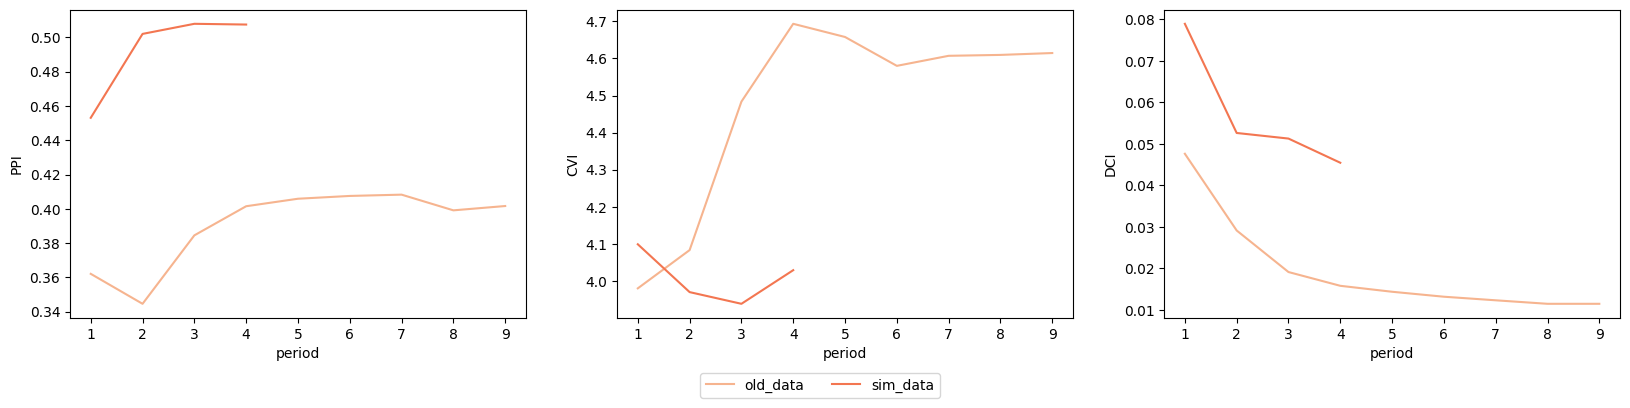

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 3, figsize=(20, 4))

# Plot the data with legends enabled temporarily
line1 = sns.lineplot(data=data, x='period', y='PPI', hue='series', ax=ax[0], palette=sns.color_palette("rocket_r")[:3])
line2 = sns.lineplot(data=data, x='period', y='CVI', hue='series', ax=ax[1], palette=sns.color_palette("rocket_r")[:3])
line3 = sns.lineplot(data=data, x='period', y='DCI', hue='series', ax=ax[2], palette=sns.color_palette("rocket_r")[:3])

# Get handles and labels from the first plot
handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()

# Add a single legend
fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.show()